In [1]:
import pandas as pd
from csvCreator import get_readable_date
import numpy as np

In [2]:
def to_evenly_spaced(df):
    date = df['time'].apply(lambda x: get_readable_date(x))
    df.insert(loc=1, column='date', value=date)
    median = np.trunc(df.groupby('date').size().median())
    df.drop(['date'], axis=1, inplace=True)
    day = np.trunc(len(df.index) / median)
    new_last_index = int(median * day)

    even_time = []
    firs_time = df[['time']].iloc[1].values.item()
    for i in range(len(df.index)):
        even_time.append(firs_time)
        firs_time += 60
    df.drop(['time'], axis=1, inplace=True)
#     df.insert(loc=0, column='time', value=even_time)
    df = df.iloc[:new_last_index]
    return df.drop(['phq_2'], axis=1), df.drop(['phq_1'], axis=1), int(median)

In [3]:
def generator(data, look_b, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + look_b
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + look_b, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + look_b
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           look_b // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - look_b, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets


In [12]:
output_path = '/Volumes/hex/ST-1946093440-res/'
p = pd.read_csv(output_path + 'ST-1946093440_1.0.csv')

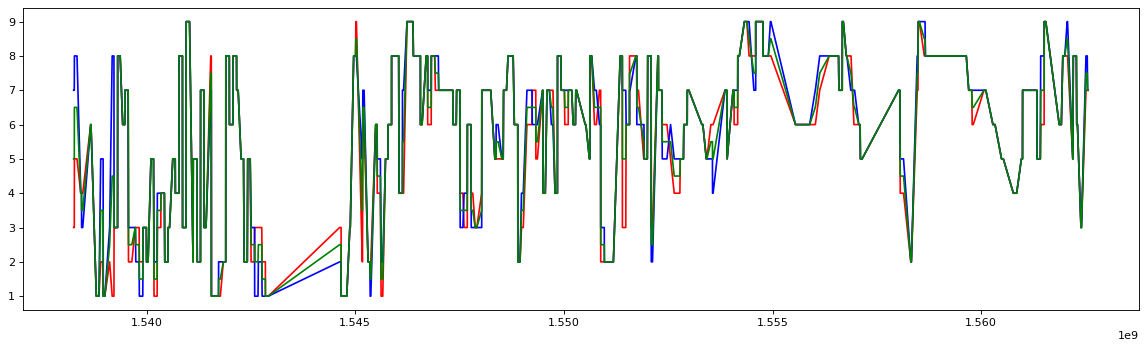

In [13]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
yaxis2 = p[['phq_2']]
avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [14]:
p.head()

,time,window,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,...,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
0,1538249770,62,-0.17,2.44,9.61,2.53,1.80,2.53,-0.06,0.08,...,7,3.0,7,67,70,0,0,35,3,7
1,1538249832,59,-0.17,0.03,9.62,0.03,1.76,0.03,-0.03,0.09,...,7,3.0,7,67,70,0,0,35,3,7
2,1538249891,60,-0.16,0.03,9.61,0.03,1.76,0.03,-0.03,0.09,...,7,3.0,7,67,70,0,0,35,3,7
3,1538249951,60,-0.16,0.03,9.61,0.03,1.76,0.03,-0.04,0.09,...,7,3.0,7,67,70,0,0,35,3,7
4,1538250011,60,-0.16,0.03,9.62,0.03,1.76,0.03,-0.03,0.09,...,7,3.0,7,67,70,0,0,35,3,7


In [15]:
# drop zero columns (or almost zeros)
# p = p.drop(['alc','cig', 'period', 'work_time', 'day_sleep'], axis=1)

In [16]:
# just numerical data
p = p.drop([ 'window'], axis=1)
p_1, p_2, median = to_evenly_spaced(p)

In [17]:
float_data_1 = p_1.to_numpy()
p_1.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,mood,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1
0,-0.17,2.44,9.61,2.53,1.80,2.53,-0.06,0.08,0.05,0.09,...,7.0,7,3.0,7,67,70,0,0,35,3
1,-0.17,0.03,9.62,0.03,1.76,0.03,-0.03,0.09,0.06,0.09,...,7.0,7,3.0,7,67,70,0,0,35,3
2,-0.16,0.03,9.61,0.03,1.76,0.03,-0.03,0.09,0.06,0.08,...,7.0,7,3.0,7,67,70,0,0,35,3
3,-0.16,0.03,9.61,0.03,1.76,0.03,-0.04,0.09,0.07,0.09,...,7.0,7,3.0,7,67,70,0,0,35,3
4,-0.16,0.03,9.62,0.03,1.76,0.03,-0.03,0.09,0.03,0.10,...,7.0,7,3.0,7,67,70,0,0,35,3


In [18]:
float_data_2 = p_2.to_numpy()
p_2.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,mood,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_2
0,-0.17,2.44,9.61,2.53,1.80,2.53,-0.06,0.08,0.05,0.09,...,7.0,7,3.0,7,67,70,0,0,35,7
1,-0.17,0.03,9.62,0.03,1.76,0.03,-0.03,0.09,0.06,0.09,...,7.0,7,3.0,7,67,70,0,0,35,7
2,-0.16,0.03,9.61,0.03,1.76,0.03,-0.03,0.09,0.06,0.08,...,7.0,7,3.0,7,67,70,0,0,35,7
3,-0.16,0.03,9.61,0.03,1.76,0.03,-0.04,0.09,0.07,0.09,...,7.0,7,3.0,7,67,70,0,0,35,7
4,-0.16,0.03,9.62,0.03,1.76,0.03,-0.03,0.09,0.03,0.10,...,7.0,7,3.0,7,67,70,0,0,35,7


In [19]:
median

380

In [52]:
# first 181 days as training
mean = float_data_1[:68780].mean(axis=0)
float_data_1 -= mean
std = float_data_1[:68780].std(axis=0)
float_data_1 /= std

In [53]:
# first 181 days as training
mean = float_data_2[:68780].mean(axis=0)
float_data_2 -= mean
std = float_data_2[:68780].std(axis=0)
float_data_2 /= std

In [54]:
float_data_1[0]

array([ 0.0049298 ,  1.86338931,  1.77606345,  2.07669065,  0.16571793,
        2.07669065, -0.07085863, -0.3286536 , -0.04260749, -0.3205674 ,
       -0.02446753, -0.29042659, -0.06013779, -0.15342173, -1.2395519 ,
        0.23424088,  1.85384281, -0.09998665, -0.0507032 , -0.04083109,
       -0.27282066,  0.14634237,  1.40075935,  1.4329803 , -0.26509431,
        0.58931601,  2.28517998,  1.10907774, -0.89886911, -1.10621532,
        0.41569647, -0.80335227])

In [55]:
float_data_2[0]

array([ 0.0049298 ,  1.86338931,  1.77606345,  2.07669065,  0.16571793,
        2.07669065, -0.07085863, -0.3286536 , -0.04260749, -0.3205674 ,
       -0.02446753, -0.29042659, -0.06013779, -0.15342173, -1.2395519 ,
        0.23424088,  1.85384281, -0.09998665, -0.0507032 , -0.04083109,
       -0.27282066,  0.14634237,  1.40075935,  1.4329803 , -0.26509431,
        0.58931601,  2.28517998,  1.10907774, -0.89886911, -1.10621532,
        0.41569647,  0.78444856])

In [56]:
# assume each day got 744 value (average value) that means 17 value per Hour.
# most probably will be 3
# step = 60 / (median / 24)
step = 4
# observations will look back 7 days (average)
look_back = step * 7 * 24
delay = 24 * step

# one day
batch_size = median

In [57]:
batch_size

380

In [58]:
step

4

In [59]:
print (len(p_1))
print (len(p_2))

95380
95380


In [60]:
# for phq-1
train_gen_1 = generator(float_data_1,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=68780,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_1 = generator(float_data_1,
                    look_b=look_back,
                    delay=delay,
                    min_index=68781,
                    max_index=83980,
                    step=step,
                    batch_size=batch_size)
test_gen_1 = generator(float_data_1,
                     look_b=look_back,
                     delay=delay,
                     min_index=83981,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


In [61]:
# for phq-1
train_gen_2 = generator(float_data_2,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=68780,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_2 = generator(float_data_2,
                    look_b=look_back,
                    delay=delay,
                    min_index=68781,
                    max_index=83980,
                    step=step,
                    batch_size=batch_size)
test_gen_2 = generator(float_data_2,
                     look_b=look_back,
                     delay=delay,
                     min_index=83981,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [62]:
test_steps = (len(p_1.index) - 83980)//batch_size
val_steps = (83980 - 68780)//batch_size
per_epoch =68780//batch_size
per_epoch

181

In [63]:
val_steps 

40

In [64]:
test_steps

30

In [70]:
def evaluate_naive_model(v_gen):
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(v_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [71]:
evaluate_naive_model(val_gen_1)

1.2485450317367772


In [67]:
evaluate_naive_model(val_gen_2)

1.1235955903167507


# One GRU layer Model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [69]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data_1.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimzer=RMSprop(), loss='mae')
history = model.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 181 steps, validate for 40 steps
Epoch 1/20
181/181 [==============================] - 52s 288ms/step - loss: 0.3127 - val_loss: 0.2248
Epoch 2/20
181/181 [==============================] - 49s 268ms/step - loss: 0.2039 - val_loss: 0.2198
Epoch 3/20
181/181 [==============================] - 47s 262ms/step - loss: 0.1927 - val_loss: 0.2028
Epoch 4/20
181/181 [==============================] - 47s 260ms/step - loss: 0.1872 - val_loss: 0.1886
Epoch 5/20
181/181 [==============================] - 46s 255ms/step - loss: 0.1833 - val_loss: 0.1904
Epoch 6/20
181/181 [==============================] - 46s 252ms/step - loss: 0.1798 - val_loss: 0.2043
Epoch 7/20
181/181 [==============================] - 48s 268ms/step - loss: 0.1785 - val_loss: 0.2005
Epoch 8/20
181/181 [==============================] - 48s 263ms/step - loss: 0.1770 - val_loss: 0.1948
Epoch 9/20
181/181 [==============================] - 48s 265ms/step - loss: 0.1736 - val_loss: 0.2091
Epoch 10/20
181/181 [=========

In [72]:
model.save('model_1_440.h5')

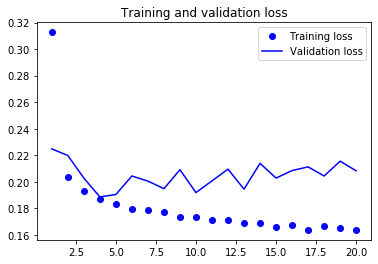

In [73]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
model.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 86ms/step - loss: 0.2564


0.25639660004526377

# One GRU unit for phq-2

In [75]:
model_1_2 = Sequential()
model_1_2.add(layers.GRU(32, input_shape=(None, float_data_2.shape[-1])))
model_1_2.add(layers.Dense(1))

model_1_2.compile(optimzer=RMSprop(), loss='mae')
history_1_2 = model_1_2.fit(train_gen_2,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_2,
                    validation_steps=val_steps)


Train for 181 steps, validate for 40 steps
Epoch 1/20
181/181 [==============================] - 53s 293ms/step - loss: 0.2466 - val_loss: 0.2378
Epoch 2/20
181/181 [==============================] - 54s 300ms/step - loss: 0.1903 - val_loss: 0.2438
Epoch 3/20
181/181 [==============================] - 50s 279ms/step - loss: 0.1806 - val_loss: 0.2333
Epoch 4/20
181/181 [==============================] - 52s 290ms/step - loss: 0.1771 - val_loss: 0.2318
Epoch 5/20
181/181 [==============================] - 60s 331ms/step - loss: 0.1745 - val_loss: 0.2211
Epoch 6/20
181/181 [==============================] - 52s 287ms/step - loss: 0.1726 - val_loss: 0.2205
Epoch 7/20
181/181 [==============================] - 54s 300ms/step - loss: 0.1643 - val_loss: 0.2453
Epoch 8/20
181/181 [==============================] - 53s 292ms/step - loss: 0.1656 - val_loss: 0.2303
Epoch 9/20
181/181 [==============================] - 55s 305ms/step - loss: 0.1654 - val_loss: 0.2275
Epoch 10/20
181/181 [=========

In [76]:
model.save('model_1_2_440.h5')

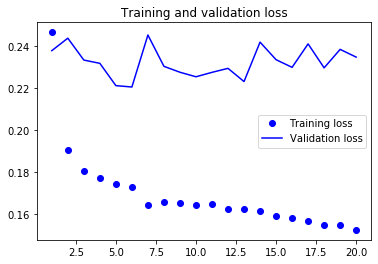

In [77]:
loss = history_1_2.history['loss']
val_loss = history_1_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [78]:
model_1_2.evaluate(test_gen_2, steps=30)

30/30 [==============================] - 3s 84ms/step - loss: 0.2578


0.25780001015712817

# 1D convenet

In [79]:
model_2 = Sequential()
model_2.add(layers.Conv1D(32, 5, activation='relu',
                            input_shape=(None, float_data_1.shape[-1])))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.GlobalMaxPooling1D())
model_2.add(layers.Dense(1))

model_2.compile(optimizer=RMSprop(), loss='mae')
history_2 = model_2.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Train for 181 steps, validate for 40 steps
Epoch 1/20
181/181 [==============================] - 21s 114ms/step - loss: 0.4538 - val_loss: 0.6038
Epoch 2/20
181/181 [==============================] - 23s 125ms/step - loss: 0.2914 - val_loss: 0.5145
Epoch 3/20
181/181 [==============================] - 21s 115ms/step - loss: 0.2418 - val_loss: 0.6910
Epoch 4/20
181/181 [==============================] - 20s 109ms/step - loss: 0.2133 - val_loss: 0.5436
Epoch 5/20
181/181 [==============================] - 19s 107ms/step - loss: 0.1922 - val_loss: 0.6895
Epoch 6/20
181/181 [==============================] - 19s 106ms/step - loss: 0.1785 - val_loss: 0.5196
Epoch 7/20
181/181 [==============================] - 19s 106ms/step - loss: 0.1691 - val_loss: 0.6861
Epoch 8/20
181/181 [==============================] - 19s 105ms/step - loss: 0.1585 - val_loss: 0.6899
Epoch 9/20
181/181 [==============================] - 19s 106ms/step - loss: 0.1510 - val_loss: 0.5349
Epoch 10/20
181/181 [=========

In [80]:
model_2.save('model_2_440.h5') 

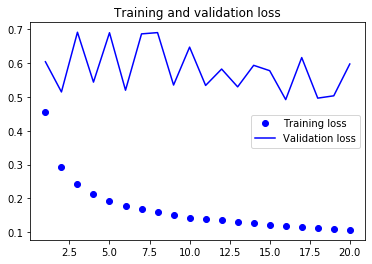

In [81]:
import matplotlib.pyplot as plt
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [83]:
model_2.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 2s 64ms/step - loss: 0.5141


0.514138999581337

# 1D convnet and GRU model

In [84]:

model_3 = Sequential()
model_3.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_3.add(layers.MaxPooling1D(3))
model_3.add(layers.Conv1D(32, 5, activation='relu'))
model_3.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.3))
model_3.add(layers.Dense(1))

model_3.summary()
model_3.compile(optimizer=RMSprop(), loss='mae')
history_3 = model_3.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 16,673
Trainable params: 16,673
Non-trainable params: 0
_________________________________________________________________
Train for 181 steps, validate for 40 steps
Epoch 1/20
181/181 [==============================] - 49s 273ms/step - lo

In [85]:
model_3.save('model_3_440.h5') 

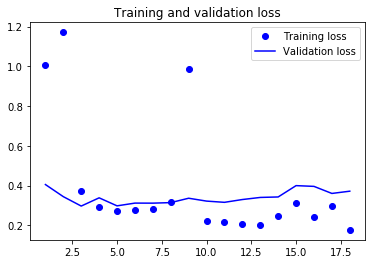

In [86]:
loss = history_3.history['loss'][1:-1]
val_loss = history_3.history['val_loss'][1:-1]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [87]:
model_3.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 89ms/step - loss: 0.3978


0.3977709118276834

In [88]:
model_7 = Sequential()
model_7.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_7.add(layers.MaxPooling1D(3))
model_7.add(layers.Conv1D(32, 5, activation='relu'))
model_7.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2))
model_7.add(layers.Dense(1))

model_7.summary()
model_7.compile(optimizer=RMSprop(), loss='mae')
history_7 = model_7.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=10,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 16,673
Trainable params: 16,673
Non-trainable params: 0
_________________________________________________________________
Train for 181 steps, validate for 40 steps
Epoch 1/10
181/181 [==============================] - 35s 192ms/step - lo

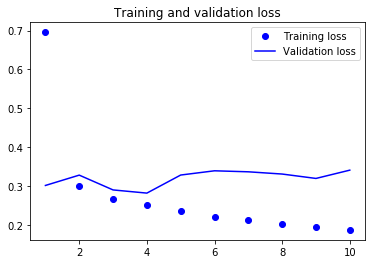

In [89]:
loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [90]:
model_7.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 2s 62ms/step - loss: 0.3405


0.34047195613384246

# One GRU layer with recurrent dropout

In [91]:
model_4 = Sequential()
model_4.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     input_shape=(None, float_data_1.shape[-1])))
model_4.add(layers.Dense(1))

model_4.compile(optimizer=RMSprop(), loss='mae')
history_4 = model_4.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 181 steps, validate for 40 steps
Epoch 1/20
181/181 [==============================] - 59s 327ms/step - loss: 245.7569 - val_loss: 0.6753
Epoch 2/20
181/181 [==============================] - 58s 321ms/step - loss: 2.3316 - val_loss: 0.4097
Epoch 3/20
181/181 [==============================] - 58s 323ms/step - loss: 0.3558 - val_loss: 0.2709
Epoch 4/20
181/181 [==============================] - 59s 326ms/step - loss: 0.2839 - val_loss: 0.2408
Epoch 5/20
181/181 [==============================] - 58s 322ms/step - loss: 0.2588 - val_loss: 0.2338
Epoch 6/20
181/181 [==============================] - 59s 326ms/step - loss: 0.4256 - val_loss: 0.2219
Epoch 7/20
181/181 [==============================] - 58s 323ms/step - loss: 0.2556 - val_loss: 0.2383
Epoch 8/20
181/181 [==============================] - 59s 324ms/step - loss: 0.6176 - val_loss: 0.2097
Epoch 9/20
181/181 [==============================] - 58s 322ms/step - loss: 1.4240 - val_loss: 0.2162
Epoch 10/20
181/181 [=======

In [75]:
model_4.save('model_4_404.h5') 

In [92]:
loss = history_4.history['loss']2:]
val_loss = history_4.history['val_loss'][2:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-92-0a2076cabc6a>, line 1)

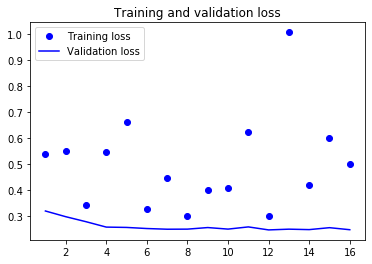

In [78]:
loss = history_4.history['loss'][2:-2]
val_loss = history_4.history['val_loss'][2:-2]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [93]:
model_4.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 100ms/step - loss: 0.2249


0.2248545315116644

In [94]:
model_5 = Sequential()
model_5.add(layers.Conv1D(64, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_5.add(layers.MaxPooling1D(3))
model_5.add(layers.Conv1D(64, 5, activation='relu'))
model_5.add(layers.GRU(64, dropout=0.1, recurrent_dropout=0.2))
model_5.add(layers.Dense(1))

model_5.summary()
model_5.compile(optimizer=RMSprop(), loss='mae')
history_5 = model_5.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 64)          10304     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
gru_7 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 55,873
Trainable params: 55,873
Non-trainable params: 0
_________________________________________________________________
Train for 181 steps, validate for 40 steps
Epoch 1/20
181/181 [==============================] - 68s 377ms/step - lo

In [95]:
model_5.save('model_5_440.h5') 

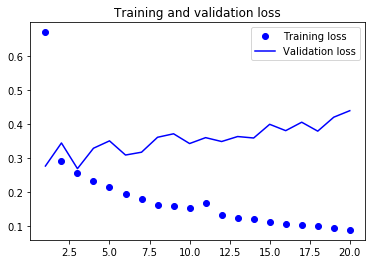

In [96]:
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [99]:
model_5.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 97ms/step - loss: 0.4482


0.4482114111383756

In [98]:
from tensorflow.keras.optimizers import Adam

model_6 = Sequential()
model_6.add(layers.LSTM(30,input_shape=(None, float_data_1.shape[-1])))
model_6.add(layers.Dense(1, activation='linear'))

model_6.summary()
model_6.compile(optimizer=Adam(lr=0.001), loss='mse')
history_6 = model_6.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30)                7560      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 7,591
Trainable params: 7,591
Non-trainable params: 0
_________________________________________________________________
Train for 181 steps, validate for 40 steps
Epoch 1/20
181/181 [==============================] - 65s 361ms/step - loss: 0.2808 - val_loss: 0.2767
Epoch 2/20
181/181 [==============================] - 62s 344ms/step - loss: 0.1350 - val_loss: 0.4450
Epoch 3/20
181/181 [==============================] - 63s 348ms/step - loss: 0.0879 - val_loss: 0.6343
Epoch 4/20
181/181 [==============================] - 62s 342ms/step - loss: 0.0615 - val_loss: 0.8191
Epoch 5/20
181/181 [==============================] - 62s 3

KeyboardInterrupt: 

In [88]:
model_5.save('model_6_440.h5') 

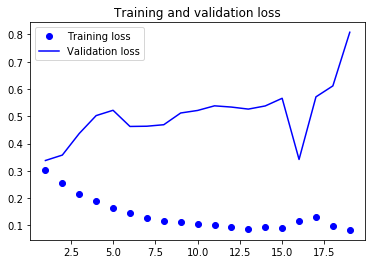

In [95]:
loss = history_6.history['loss'][1:]
val_loss = history_6.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [90]:
model_6.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 2s 72ms/step - loss: 1.3153


1.3153438044711947